#### <i> AI Powered Fault Prediction and Optimization in New Energy Vehicles (NEVs) for the US Market </i>
#### <i> Dataset Link ---> https://www.kaggle.com/datasets/ziya07/fault-prediction-and-optimization-in-nevs </i>
#### <i> Import Library Files </i>

In [17]:
import pandas as pd
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


#### <i> Load The Dataset </i>

In [18]:
data = pd.read_csv("Fault_nev_dataset.csv")
data

,battery_voltage,battery_current,engine_temperature,motor_efficiency,tire_pressure,fuel_efficiency,speed,acceleration,driving_distance,ambient_temperature,humidity,road_condition,last_service_distance,service_frequency,repair_cost,downtime,fault_type,time_since_last_fault
0,12.623620,11.479653,83.085284,93.454060,35.719959,13.936355,77.790834,0.116398,360.133962,35.678901,46.154857,Hilly,14137.962594,5000,200,1,sensor_malfunction,3
1,14.352143,23.966533,82.348940,95.933628,38.054323,14.734357,20.686363,0.560318,343.641502,16.268024,43.303847,Smooth,7157.749964,15000,200,1,engine_overheating,4
2,13.695982,35.553104,115.312729,85.009358,37.601609,18.545474,104.687348,2.493737,47.877099,26.245514,32.330774,Smooth,5435.949218,5000,100,1,engine_overheating,10
3,13.295975,30.627871,82.477310,92.497482,31.538999,13.400044,73.573949,2.300305,461.286202,11.802415,62.508667,Bumpy,8054.105310,10000,200,2,battery_issue,1
4,11.968056,33.229640,83.597486,91.434920,31.492495,18.696497,18.864466,1.051928,284.236101,21.501729,53.363691,Hilly,11958.023148,10000,200,2,no_fault,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11.774746,27.993430,113.264788,88.842141,38.973973,16.844354,69.568454,0.819479,257.464748,32.882799,45.161152,Smooth,10052.553903,5000,300,1,battery_issue,11
996,14.251941,38.481512,77.863660,86.688024,31.193810,15.032204,80.044423,0.628558,82.685213,34.875442,84.869525,Hilly,7473.446711,15000,300,3,sensor_malfunction,5
997,11.910456,7.413531,85.489393,87.891446,33.278428,17.651488,109.389226,1.365986,488.856406,37.335396,68.905989,Hilly,9013.480042,5000,100,1,sensor_malfunction,6
998,14.350712,6.996915,84.502277,90.598812,38.157454,14.852906,41.474420,2.725313,53.962277,9.874400,38.002400,Smooth,12188.640729,5000,100,1,engine_overheating,4


#### <i> Dataset Overview </i>

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   battery_voltage        1000 non-null   float64
 1   battery_current        1000 non-null   float64
 2   engine_temperature     1000 non-null   float64
 3   motor_efficiency       1000 non-null   float64
 4   tire_pressure          1000 non-null   float64
 5   fuel_efficiency        1000 non-null   float64
 6   speed                  1000 non-null   float64
 7   acceleration           1000 non-null   float64
 8   driving_distance       1000 non-null   float64
 9   ambient_temperature    1000 non-null   float64
 10  humidity               1000 non-null   float64
 11  road_condition         1000 non-null   object 
 12  last_service_distance  1000 non-null   float64
 13  service_frequency      1000 non-null   int64  
 14  repair_cost            1000 non-null   int64  
 15  downt

In [20]:
data.describe()

,battery_voltage,battery_current,engine_temperature,motor_efficiency,tire_pressure,fuel_efficiency,speed,acceleration,driving_distance,ambient_temperature,humidity,last_service_distance,service_frequency,repair_cost,downtime,time_since_last_fault
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,12.970770,22.745606,95.120286,89.807501,34.941053,14.984645,59.197061,1.447112,243.248346,14.839749,55.398422,10079.262230,10060.000000,207.200000,1.805000,6.052000
std,0.876412,10.226646,14.533710,5.729787,2.868099,2.891948,34.768037,0.854743,141.117262,14.107662,20.051710,2902.028207,4020.268966,120.260645,0.979763,3.206802
min,11.513896,5.112639,70.000582,80.013068,30.000307,10.061838,0.171401,0.000723,0.121467,-9.997359,20.066013,5013.146334,5000.000000,100.000000,1.000000,1.000000
25%,12.207920,13.437599,83.067549,84.838015,32.449740,12.493800,28.826600,0.707968,124.691856,3.207206,37.684168,7568.843394,5000.000000,100.000000,1.000000,3.000000
50%,12.990422,23.155687,95.030696,89.685586,34.945981,14.904028,58.157163,1.451972,239.350476,14.759340,55.445628,10185.833939,10000.000000,200.000000,2.000000,6.000000
75%,13.732959,31.616277,107.955176,94.750816,37.399935,17.398518,90.775722,2.143399,357.952487,26.810862,72.969150,12572.818325,15000.000000,300.000000,2.000000,9.000000
max,14.499153,39.979480,119.891043,99.991154,39.977494,19.993503,119.935282,2.996714,498.006392,39.975259,89.977124,14990.907678,15000.000000,500.000000,4.000000,11.000000


#### <i> Data Visulization And Analysis </i>

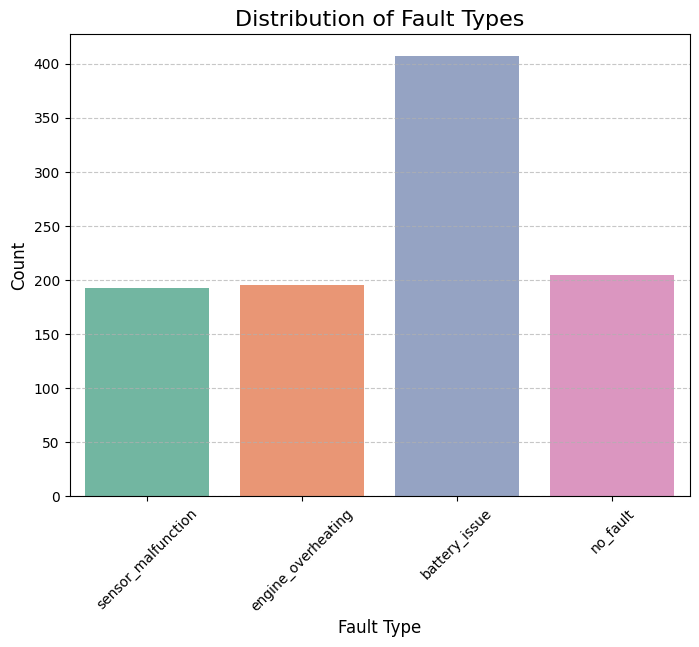

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizations

## 1. Distribution of Fault Types
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='fault_type', palette='Set2')
plt.title("Distribution of Fault Types", fontsize=16)
plt.xlabel("Fault Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


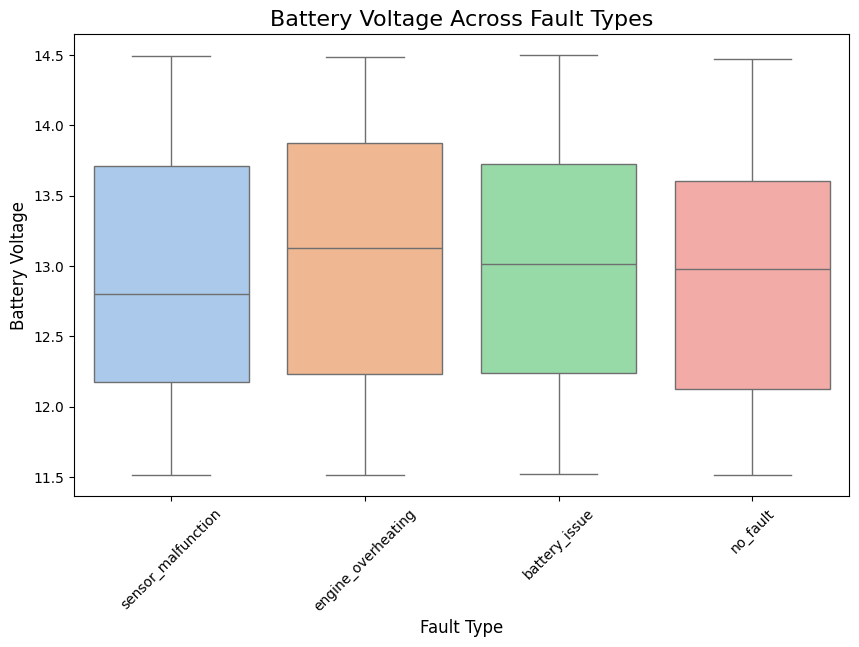

In [22]:
## 3. Battery Voltage vs. Fault Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='fault_type', y='battery_voltage', palette='pastel')
plt.title("Battery Voltage Across Fault Types", fontsize=16)
plt.xlabel("Fault Type", fontsize=12)
plt.ylabel("Battery Voltage", fontsize=12)
plt.xticks(rotation=45)
plt.show()

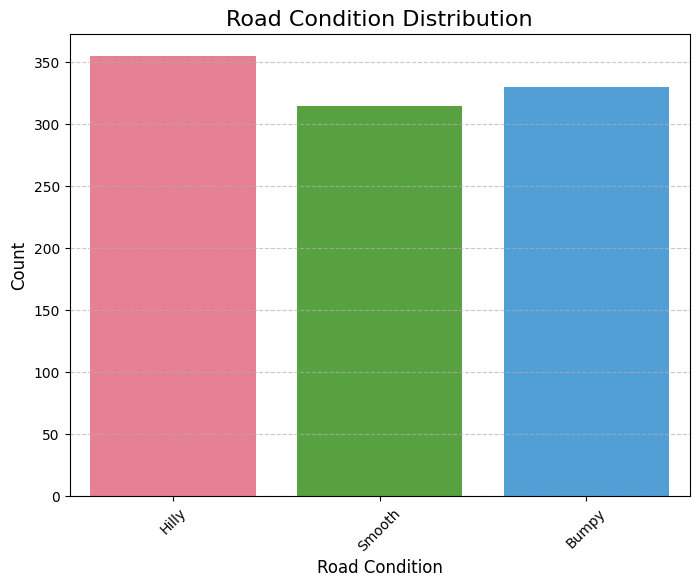

In [23]:
## 4. Road Condition Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='road_condition', palette='husl')
plt.title("Road Condition Distribution", fontsize=16)
plt.xlabel("Road Condition", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

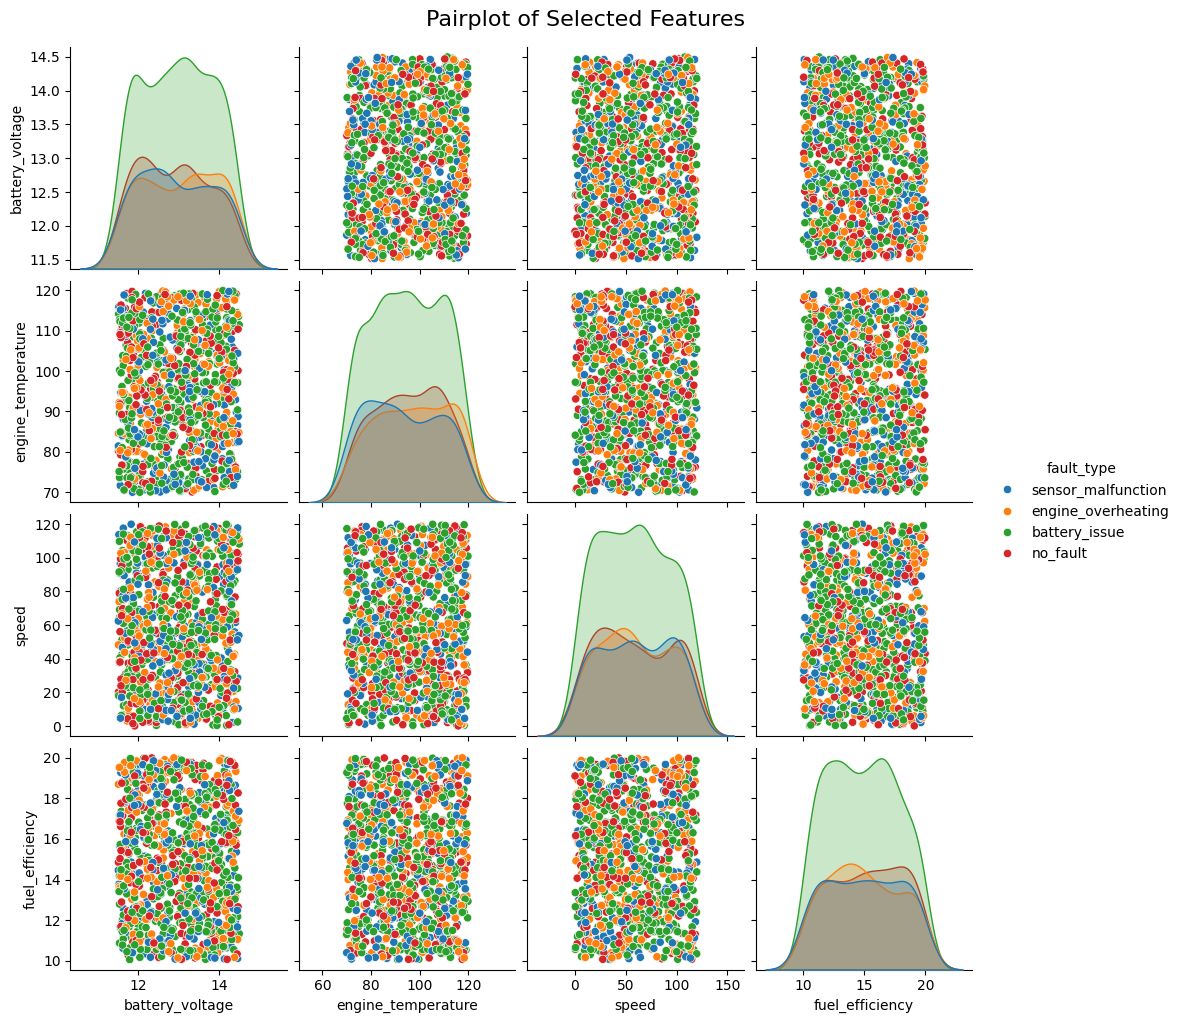

In [24]:
## 5. Pairplot for Selected Features
selected_features = ['battery_voltage', 'engine_temperature', 'speed', 'fuel_efficiency', 'fault_type']
sns.pairplot(data[selected_features], hue='fault_type', palette='tab10', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", fontsize=16, y=1.02)
plt.show()

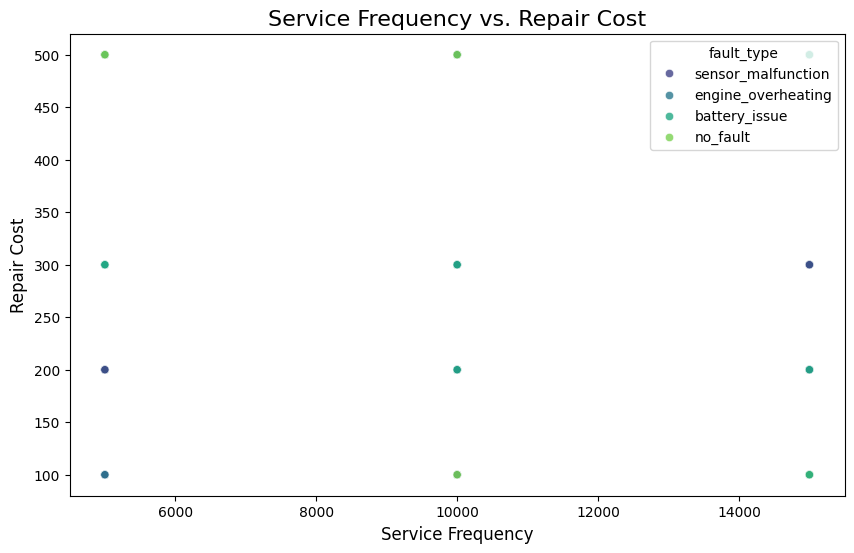

In [25]:
## 6. Service Frequency vs. Repair Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='service_frequency', y='repair_cost', hue='fault_type', palette='viridis', alpha=0.8)
plt.title("Service Frequency vs. Repair Cost", fontsize=16)
plt.xlabel("Service Frequency", fontsize=12)
plt.ylabel("Repair Cost", fontsize=12)
plt.show()


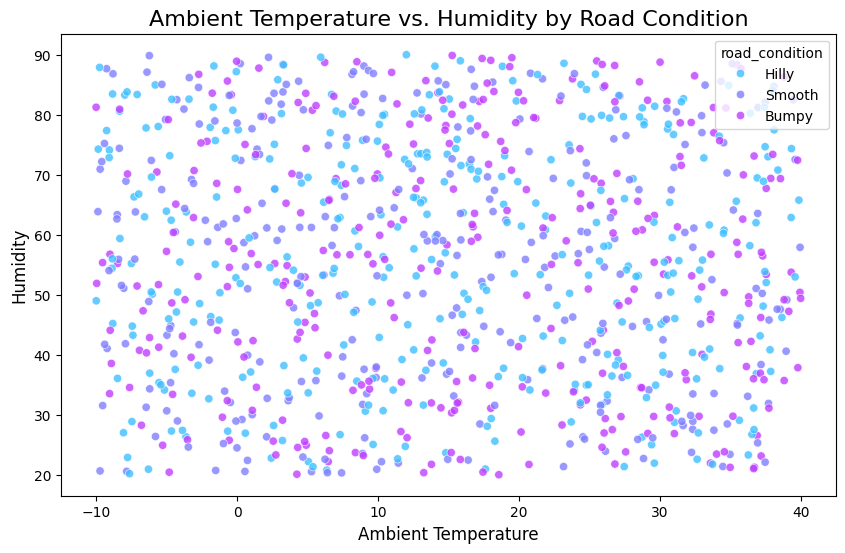

In [26]:
## 8. Ambient Temperature and Humidity Relation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='ambient_temperature', y='humidity', hue='road_condition', palette='cool', alpha=0.8)
plt.title("Ambient Temperature vs. Humidity by Road Condition", fontsize=16)
plt.xlabel("Ambient Temperature", fontsize=12)
plt.ylabel("Humidity", fontsize=12)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#### <i> Data Preprocessing </i>

In [28]:
# Separate features and target
X = data.drop(columns=['fault_type'])
y = data['fault_type']

# Identify categorical and numerical columns
categorical_columns = ['road_condition']
numerical_columns = [
    'battery_voltage', 'battery_current', 'engine_temperature', 'motor_efficiency',
    'tire_pressure', 'fuel_efficiency', 'speed', 'acceleration', 'driving_distance',
    'ambient_temperature', 'humidity', 'last_service_distance', 'service_frequency',
    'repair_cost', 'downtime', 'time_since_last_fault'
]

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert preprocessed data back to DataFrame for better interpretability
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed,
                                       columns=preprocessor.get_feature_names_out(),
                                       index=X_train.index)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed,
                                      columns=preprocessor.get_feature_names_out(),
                                      index=X_test.index)


### <i> Modeling </i>
### <i> Logistic Regression </i>

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create a pipeline for Logistic Regression
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Train the model
logistic_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_pipeline.predict(X_test)

# Evaluate the model
print("Performance of Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))


Performance of Logistic Regression:
Accuracy: 0.3550
Classification Report:
                    precision    recall  f1-score   support

     battery_issue       0.37      0.89      0.52        76
engine_overheating       0.27      0.09      0.13        34
          no_fault       0.00      0.00      0.00        48
sensor_malfunction       0.00      0.00      0.00        42

          accuracy                           0.35       200
         macro avg       0.16      0.25      0.16       200
      weighted avg       0.19      0.35      0.22       200



#### <i> Random Forest Classifier </i>

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline for Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the model
print("Performance of Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Performance of Random Forest Classifier:
Accuracy: 0.3850
Classification Report:
                    precision    recall  f1-score   support

     battery_issue       0.40      0.95      0.56        76
engine_overheating       0.43      0.09      0.15        34
          no_fault       0.40      0.04      0.08        48
sensor_malfunction       0.00      0.00      0.00        42

          accuracy                           0.39       200
         macro avg       0.31      0.27      0.19       200
      weighted avg       0.32      0.39      0.26       200



### <i> Gradient Boosting Classifier </i>

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a pipeline for Gradient Boosting
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42, n_estimators=100))
])

# Train the model
gb_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_pipeline.predict(X_test)

# Evaluate the model
print("Performance of Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))


Performance of Gradient Boosting Classifier:
Accuracy: 0.3650
Classification Report:
                    precision    recall  f1-score   support

     battery_issue       0.40      0.80      0.54        76
engine_overheating       0.36      0.26      0.31        34
          no_fault       0.38      0.06      0.11        48
sensor_malfunction       0.00      0.00      0.00        42

          accuracy                           0.36       200
         macro avg       0.28      0.28      0.24       200
      weighted avg       0.30      0.36      0.28       200



### <i> Comparison Of All Models </i>

                 Model  Accuracy
0  Logistic Regression     0.355
1        Random Forest     0.385
2    Gradient Boosting     0.365


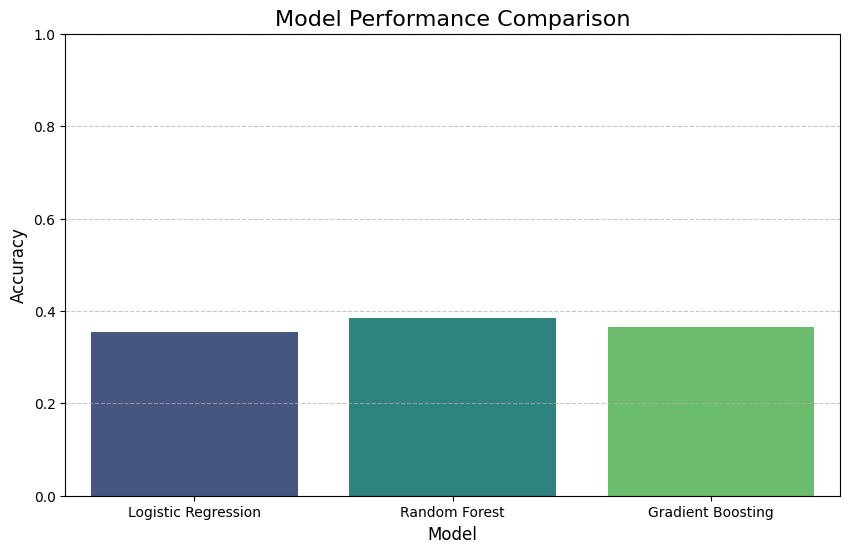

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Store performance in a dictionary
model_performance = {
    "Logistic Regression": accuracy_score(y_test, y_pred_logistic),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb)
}

# Convert performance to a DataFrame for easier visualization
performance_df = pd.DataFrame(
    list(model_performance.items()), 
    columns=['Model', 'Accuracy']
)

# Print the performance table
print(performance_df)

# Visualization: Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
